In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import the ML algorithm
from sklearn.linear_model import LinearRegression


In [2]:
# Loading the Data

performing a linear regression with one variable to predict profits for a food truck. 
The data contains 2 columns, 
- population of a city (in 10,000s) and 
- the profits of the food truck (in 10,000s).

In [3]:
data = pd.read_csv(r'E:\MYLEARN\2-ANALYTICS-DataScience\datasets\ex1data1.txt', names = ['population', 'profit'])

In [4]:
data.shape

(97, 2)

In [5]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
# Split population and profit into X and y
X_df = pd.DataFrame(data.population)
y_df = pd.DataFrame(data.profit)

In [7]:
# Length, or number of observations, in our data
m = len(y_df)

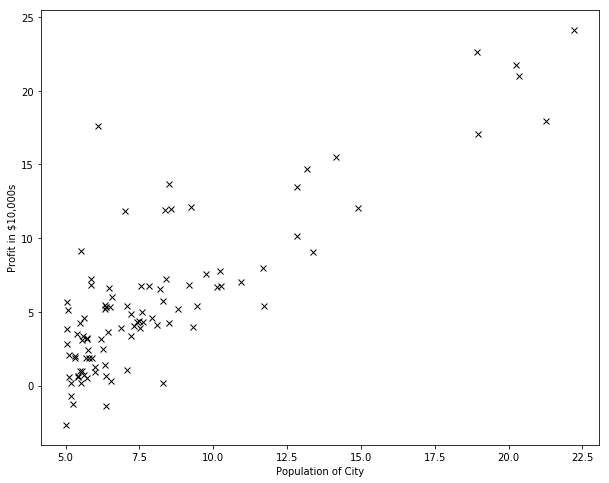

In [8]:
plt.figure(figsize=(10,8))
plt.plot(X_df, y_df, 'kx')

plt.xlabel('Population of City')
plt.ylabel('Profit in $10,000s');

The idea of linear regression is to find a relationship between our target or dependent variable (y) and a set of explanatory variables (x_1, x_2...).

In our case with one variable, this relationship is a line defined by parameters beta and the following form: $y = \beta_0 + \beta_1x$


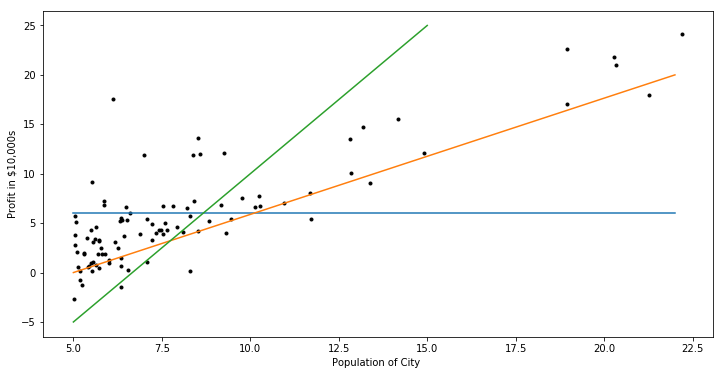

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(X_df, y_df, 'k.')

plt.plot([5, 22], [6,6], '-')
plt.plot([5, 22], [0,20], '-')
plt.plot([5, 15], [-5,25], '-')

plt.xlabel('Population of City ')
plt.ylabel('Profit in $10,000s');

#### Sample gradient descent demo

In [10]:
x_quad = [n/10 for n in range(0, 100)]
y_quad = [(n-4)**2 + 5 for n in x_quad]

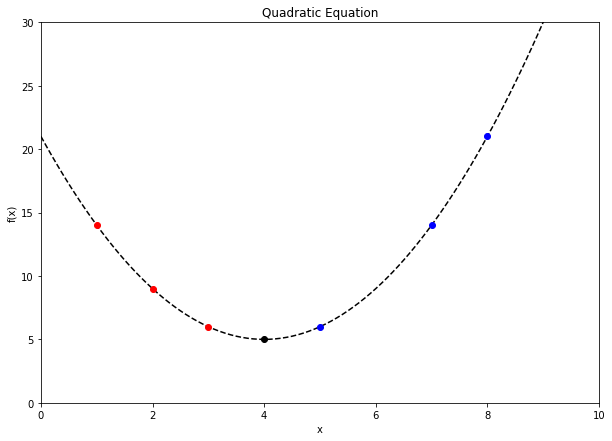

In [11]:
plt.figure(figsize = (10,7))

plt.plot(x_quad, y_quad, 'k--')

plt.axis([0, 10, 0, 30])

plt.plot([1, 2, 3], [14, 9, 6],  'ro')
plt.plot([5, 7, 8], [6, 14, 21], 'bo')

plt.plot(4, 5, 'ko')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Quadratic Equation');

... back to the main code

In [12]:
population = X_df['population'].values
profit     = y_df['profit'].values

#### Define cost function of linear regression (MSE)

In [13]:
def compute_cost(X, y, theta):
    """
    cost_function(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    
    # number of training examples
    m = len(y) 
    
    ## Calculate the cost with the given parameters
    J = np.sum(np.square(np.matmul(X, theta) - y)) / (2 * m)
    
    return J

a column of 1s is prepended onto the input data. This allows us to vectorize the cost function, as well as make it usable for multiple linear regression later. This first value θ0 now behaves as a constant in the cost function.

In [16]:
# Initial coefficients = 0, 0 and initial cost (MSE)
theta = np.array([0, 0])

X = np.column_stack((np.ones(len(population)), population))
y = profit

cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost:', cost)

theta: [0 0]
cost: 32.072733877455676


We’ll now minimize the cost using the __gradient descent__ algorithm. 

Intuitively, gradient descent takes small, linear hops down the slope of a function in each feature dimension, with the size of each hop determined by the partial derivative of the cost function with respect to that feature and a __learning rate__ multiplier __α__. 

In [17]:
X[:4]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032]])

In [22]:
def gradient_descent(X, y, alpha, iterations):
    """
    gradient_descent Performs gradient descent to learn theta
    updates theta by taking num_iters gradient steps with learning rate alpha
    """
    theta = np.array([0, 0])
    m = len(y)
    
    cost_history = [0] * iterations
    
    for iteration in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum( np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:, 1])
        
        theta = np.array([t0, t1])
        
        cost = compute_cost(X, y, theta)
        cost_history[iteration] = cost
        
        print(cost)

    return theta, cost_history

In [23]:
iterations = 1500
alpha      = 0.01 # learning rate

theta, cost_history = gradient_descent(X, y, alpha, iterations)
cost  = compute_cost(X, y, theta)

print("theta:", theta)
print('cost:', compute_cost(X, y, theta))

6.737190464870007
5.931593568604956
5.901154707081388
5.895228586444221
5.89009494311733
5.885004158443647
5.879932480491418
5.874879094762575
5.869843911806386
5.8648268653129305
5.859827889932181
5.85484692057229
5.849883892376588
5.844938740722034
5.840011401218361
5.8351018097072265
5.830209902261388
5.825335615183863
5.820478885007099
5.815639648492154
5.81081784262787
5.806013404630044
5.801226271940628
5.796456382226899
5.7917036733806535
5.786968083517396
5.782249550975539
5.777548014315596
5.772863412319381
5.768195683989212
5.76354476854712
5.758910605434049
5.754293134309077
5.749692295048629
5.745108027745684
5.740540272709014
5.735988970462381
5.731454061743792
5.726935487504702
5.722433188909257
5.717947107333528
5.713477184364749
5.709023361800549
5.704585581648199
5.700163786123856
5.695757917651815
5.691367918863752
5.68699373259798
5.682635301898707
5.678292570015292
5.673965480401506
5.669653976714798
5.6653580028155535
5.661077502766381
5.6568124208313595
5.65256270

4.61234899586597
4.611861373491642
4.611375507504967
4.610891391579536
4.610409019411731
4.609928384720636
4.609449481247961
4.60897230275796
4.608496843037341
4.608023095895198
4.60755105516292
4.60708071469412
4.606612068364546
4.606145110072004
4.605679833736286
4.605216233299077
4.60475430272389
4.604294035995977
4.603835427122257
4.603378470131233
4.60292315907292
4.602469488018765
4.602017451061564
4.6015670423153985
4.601118255915542
4.600671086018401
4.600225526801421
4.59978157246303
4.5993392172225445
4.598898455320108
4.598459281016607
4.598021688593604
4.597585672353254
4.597151226618242
4.596718345731694
4.596287024057118
4.595857255978326
4.595429035899349
4.595002358244385
4.5945772174577115
4.594153608003618
4.59373152436633
4.593310961049946
4.592891912578358
4.592474373495182
4.592058338363686
4.591643801766726
4.591230758306667
4.590819202605313
4.590409129303844
4.590000533062744
4.589593408561724
4.589187750499661
4.588783553594528
4.5883808125833205
4.587979522221

#### Make predictions

In [ ]:
# new_pred = -3.63029144 + 1.16636235 * X

In [24]:
## Prediction
print (np.array([1, 3.5]).dot(theta))
print (np.array([1, 7  ]).dot(theta))

0.4519767867701763
4.534245012944713


In [25]:
## Plotting the best fit line
best_fit_x = np.linspace(0, 25, 20)

best_fit_y = [theta[0] + theta[1]*xx for xx in best_fit_x]

Text(0.5,1,'Profit vs. Population with Linear Regression Line')

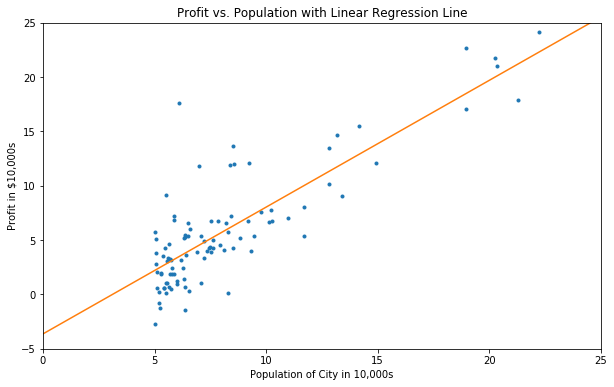

In [26]:
plt.figure(figsize=(10,6))
plt.plot(X_df.population, y_df, '.')
plt.plot(best_fit_x, best_fit_y, '-')
plt.axis([0,25,-5,25])
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profit vs. Population with Linear Regression Line')

#### Use linear regression (sklearn)

In [19]:
X = X_df.values
y = y_df.values

In [27]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X, y)

linreg.intercept_, linreg.coef_

(-3.8957808783118537, array([0.        , 1.19303364]))

In [52]:
# results of GD (earlier)
# theta: [-3.63029144  1.16636235]
# cost: 4.483388256587726